## Fitting a Model to Data $^{\href{https://andycasey.github.io/teaching/phs5000/1/}{[1]}\href{https://andycasey.github.io/teaching/phs5000/2/}{[2]}\href{https://andycasey.github.io/teaching/phs5000/3/}{[3]}}$

In [1]:
# Preamble
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.patches import Ellipse

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["olivedrab", "steelblue", "firebrick", "goldenrod"]) 
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['legend.frameon'] = False
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True

In [2]:
# Reproducability
rng = np.random.default_rng(0)

# Data
_, x, y, y_err, x_err, rho_xy = data = np.array([
    [1,  201, 592, 61,  9, -0.84],
    [2,  244, 401, 25,  4, +0.31],
    [3,   47, 583, 38, 11, +0.64],
    [4,  287, 402, 15,  7, -0.27],
    [5,  203, 495, 21,  5, -0.33],
    [6,   58, 173, 15,  9, +0.67],
    [7,  210, 479, 27,  4, -0.02],
    [8,  202, 504, 14,  4, -0.05],
    [9,  198, 510, 30, 11, -0.84],
    [10, 158, 416, 16,  7, -0.69],
    [11, 165, 393, 14,  5, +0.30],
    [12, 201, 442, 25,  5, -0.46],
    [13, 157, 317, 52,  5, -0.03],
    [14, 131, 311, 16,  6, +0.50],
    [15, 166, 400, 34,  6, +0.73],
    [16, 160, 337, 31,  5, -0.52],
    [17, 186, 423, 42,  9, +0.90],
    [18, 125, 334, 26,  8, +0.40],
    [19, 218, 533, 16,  6, -0.78],
    [20, 146, 344, 22,  5, -0.56],
]).T

# Helper Function
def _ellipse(x, y, cov, scale=2, **kwargs):
    vals, vecs = np.linalg.eig(cov)
    theta = np.degrees(np.arctan2(*vecs[::-1, 0]))
    w, h = scale * np.sqrt(vals)

    kwds = dict(lw=0.5, color='k')
    kwds.update(**kwargs)

    ellipse = Ellipse(xy=[x, y], 
                      width=w, height=h, angle=theta,
                      **kwds)
    ellipse.set_facecolor("none")
    return ellipse

# Pretty Print
pd.DataFrame(data=(data.T)[:,1:], columns=[r'$x$', r'$y$', r'$\sigma_y$', r'$\sigma_x$', r'$\rho_{xy}$'])

,$x$,$y$,$\sigma_y$,$\sigma_x$,$\rho_{xy}$
0,201.0,592.0,61.0,9.0,-0.84
1,244.0,401.0,25.0,4.0,0.31
2,47.0,583.0,38.0,11.0,0.64
3,287.0,402.0,15.0,7.0,-0.27
4,203.0,495.0,21.0,5.0,-0.33
5,58.0,173.0,15.0,9.0,0.67
6,210.0,479.0,27.0,4.0,-0.02
7,202.0,504.0,14.0,4.0,-0.05
8,198.0,510.0,30.0,11.0,-0.84
9,158.0,416.0,16.0,7.0,-0.69


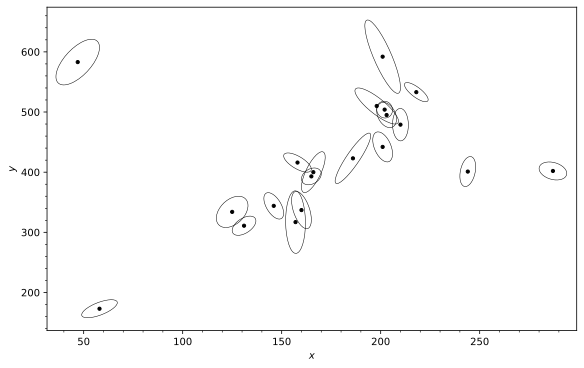

In [3]:
# Prepare Plot
covs = np.array([[[x_e**2, x_e*y_e*rho],
                  [x_e*y_e*rho, y_e**2]] \
                  for y_e, x_e, rho in zip(*data[3:])])

fig, ax = plt.subplots()

for xi, yi, cov in zip(x, y, covs):
    ax.add_artist(_ellipse(xi, yi, cov))

ax.plot(x, y, 'k.', ms=6.42)

ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')

ax.set_ylim(0.9 * ax.set_ylim()[0], 1.1 * ax.set_ylim()[1])
ax.set_xlim(0.9 * ax.set_xlim()[0], ax.set_xlim()[1])

plt.show()
plt.close()

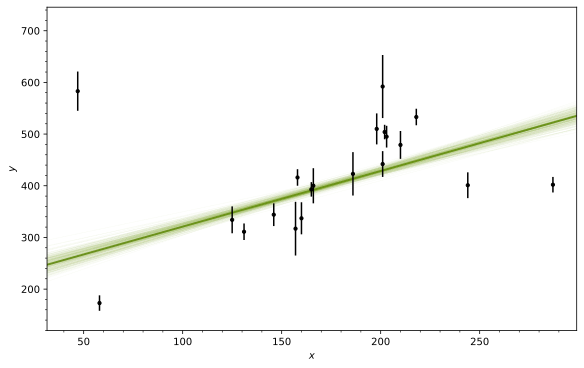

In [4]:
# Least Squares
Y = np.atleast_2d(y).T

A = np.vstack([np.ones_like(x), x]).T
C = np.diag(y_err * y_err)

C_inv = np.linalg.inv(C)

G = np.linalg.inv(A.T @ C_inv @ A)
X = G @ (A.T @ C_inv @ Y)

b, m = X.T[0]

# Prepare Plot

l = np.array([-100, 400])

fig, ax = plt.subplots()

ax.errorbar(x, y, yerr=y_err, fmt='k,')
ax.plot(x, y, 'k.', ms=6.42)

ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')

ax.set_ylim(0.9 * ax.set_ylim()[0], 1.1 * ax.set_ylim()[1])
ax.set_xlim(0.9 * ax.set_xlim()[0], ax.set_xlim()[1])

ax.plot(l, m * l + b, lw=2, zorder=-1)

draws = rng.multivariate_normal(X.T[0], G, 250)
for b_, m_ in draws:
    ax.plot(l, l * m_ + b_, c="olivedrab", lw=0.5, zorder=-1, alpha=0.05)

plt.show()
plt.close()